In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [117]:
df = pd.read_csv('people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,Engineer,10036744.14,nan,0.73
1,1,2.00,173748959.99,1,32.00,Doctor,10140513.67,0.00,0.38
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,nan,0.43
3,0,1.00,126871823.00,0,10.00,Lawyer,10042985.31,nan,0.38
4,1,9.00,85960417.41,1,99.00,Artist,10219081.59,nan,0.66


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
was_married    6000 non-null int64
children       6000 non-null float64
salary         6000 non-null float64
sex            6000 non-null int64
age            6000 non-null float64
profession     6000 non-null object
home_cost      6000 non-null float64
drive_info     3230 non-null float64
happyness      6000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


Численные признаки: был ли женат (1 или 0), кол-во детей, зарплата, пол (1 или 0), возраст, стоимость жилья, уровень счастья, есть ли водительские права (1 или 0)

Категориальные признаки: профессия

Бинарные: был ли женат, пол, есть ли водительские права

In [119]:
#уберем экспоненциальную запись стоимости домов
pd.set_option('display.float_format', '{:.2f}'.format)

In [120]:
df.head()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,Engineer,10036744.14,nan,0.73
1,1,2.00,173748959.99,1,32.00,Doctor,10140513.67,0.00,0.38
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,nan,0.43
3,0,1.00,126871823.00,0,10.00,Lawyer,10042985.31,nan,0.38
4,1,9.00,85960417.41,1,99.00,Artist,10219081.59,nan,0.66


In [121]:
df.describe()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,3230.00,6000.00
mean,0.84,2.89,84634445.97,0.66,31.78,10191838.63,0.73,0.46
std,0.36,2.85,80221297.06,0.47,32.55,312006.64,0.44,0.15
min,0.00,0.00,1765712.35,0.00,2.00,9824378.18,0.00,0.00
25%,1.00,1.00,10926690.09,0.00,10.00,10096392.99,0.00,0.35
50%,1.00,2.00,43015999.68,1.00,17.00,10177163.42,1.00,0.45
75%,1.00,4.00,158831764.75,1.00,32.00,10269196.34,1.00,0.56
max,1.00,9.00,345927135.61,1.00,100.00,20657915.51,1.00,1.00


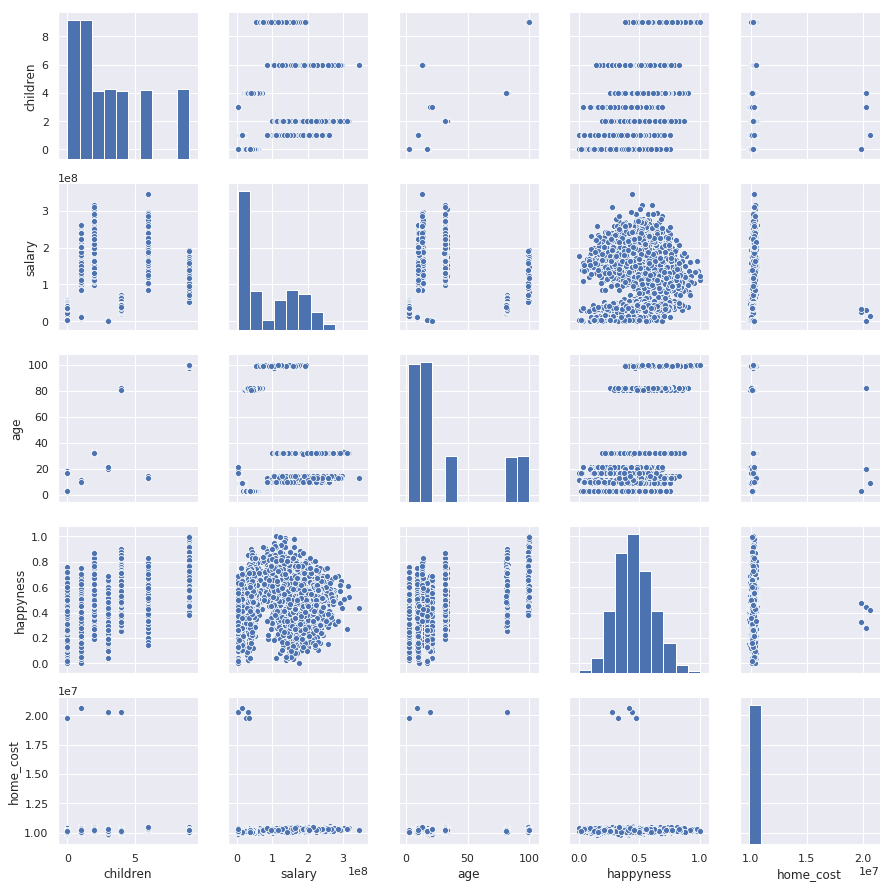

In [122]:
sns.set()
cols = ['children', 'salary', 'age', 'happyness', 'home_cost']
sns.pairplot(df[cols], height = 2.5)
plt.show()

Имеют нормальное распределение только данные, которые показывают уровень счастья

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [123]:
#ищем дубли
df.duplicated().sum()
#их нет

0

In [124]:
#ищем пропуски
df.isnull().sum()

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

Пропуски есть только в столбце с информацией о вождении. Посмотрим строки с пропущенными данными

In [125]:
null_data = df[df.isnull().any(axis=1)]
null_data.head(15)

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,Engineer,10036744.14,nan,0.73
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,nan,0.43
3,0,1.00,126871823.00,0,10.00,Lawyer,10042985.31,nan,0.38
4,1,9.00,85960417.41,1,99.00,Artist,10219081.59,nan,0.66
6,1,3.00,2106286.56,0,21.00,Homemaker,9980108.14,nan,0.39
9,1,9.00,171898854.86,1,100.00,Artist,10184430.88,nan,0.63
11,1,6.00,170399021.06,1,14.00,Entertainment,10332529.88,nan,0.53
12,0,1.00,230675293.57,0,11.00,Lawyer,10292128.12,nan,0.10
13,1,0.00,3784178.96,0,17.00,Healthcare,10199714.22,nan,0.39


(array([949., 915.,   0., 297.,   0.,   0.,   0.,   0., 297., 312.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

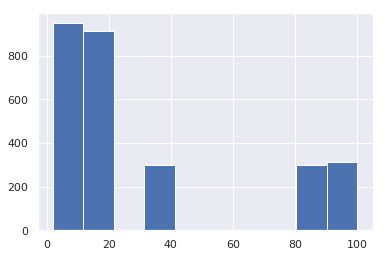

In [126]:
#проверим гипотезу, что в основном информации о правах нет у подростков и пенсионеров
plt.hist(null_data['age'])

In [127]:
# Гипотеза подтвердилась, поэтому можем заменить 
# пропущенные значения на 0 (отстутсвуют права) для тех, кому меньше 21 или больше 80

df = df[(df['age'] <= 21) | (df['age'] >= 80)].fillna(0)
df

#остальные строки для людей средних лет, у которых пропущенны значения, можем удалить
df.dropna()
df.head()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,Engineer,10036744.14,0.00,0.73
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,0.00,0.43
3,0,1.00,126871823.00,0,10.00,Lawyer,10042985.31,0.00,0.38
4,1,9.00,85960417.41,1,99.00,Artist,10219081.59,0.00,0.66
5,1,3.00,2474979.08,0,21.00,Homemaker,10016535.31,1.00,0.33


Больше нет пропущенных данных, поэтому пока можно назвать все признаки информативными

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab4c9d9ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab4c9c6b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab4c9c6048>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab4ef32a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab4ef323c8>],
 'means': []}

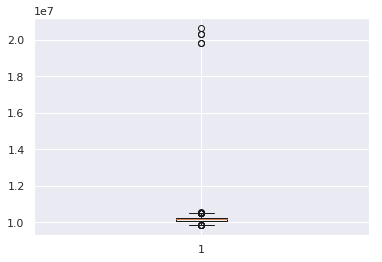

In [129]:
#ищем выбросы в стобце с ценами на дома
plt.boxplot(df['home_cost'])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342 entries, 0 to 499
Data columns (total 9 columns):
was_married    5342 non-null int64
children       5342 non-null float64
salary         5342 non-null float64
sex            5342 non-null int64
age            5342 non-null float64
profession     5342 non-null object
home_cost      5342 non-null float64
drive_info     5342 non-null float64
happyness      5342 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 417.3+ KB


In [131]:
# Судя по коробке, есть 5 выбросов: 3 очень высоких цены и 2 на границе 90%
# Проверим с помощью z-score есть ли шклишком высокие цены на дома
outliers=[]
def detect_outlier(data):
    
    threshold= 3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for d in data:
        z_score= (d - mean_1)/std_1 
        if z_score > threshold:
            outliers.append(d)
    return outliers       

In [132]:
#есть ли цены намного ниже остальных
outliers2=[]
def detect_outlier2(data):
    
    threshold=-3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for d in data:
        z_score= (d - mean_1)/std_1 
        if z_score < threshold:
            outliers2.append(d)
    return outliers2

In [133]:
# 5 сликшом дорогих домов
detect_outlier(df['home_cost'])

[20321276.469467312,
 20311969.10715062,
 19794878.47747652,
 19795323.46895183,
 20657915.51438855]

In [134]:
# нет слишком дешевых домов
detect_outlier2(df['home_cost'])

[]

In [135]:
# удаляем выбросы
df_new = df[df['home_cost'].isin(outliers) == False]

In [136]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5337 entries, 0 to 499
Data columns (total 9 columns):
was_married    5337 non-null int64
children       5337 non-null float64
salary         5337 non-null float64
sex            5337 non-null int64
age            5337 non-null float64
profession     5337 non-null object
home_cost      5337 non-null float64
drive_info     5337 non-null float64
happyness      5337 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 417.0+ KB


In [137]:
# удалилось 5 строк
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5337 entries, 0 to 499
Data columns (total 9 columns):
was_married    5337 non-null int64
children       5337 non-null float64
salary         5337 non-null float64
sex            5337 non-null int64
age            5337 non-null float64
profession     5337 non-null object
home_cost      5337 non-null float64
drive_info     5337 non-null float64
happyness      5337 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 417.0+ KB


# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [138]:
#матрица корреляций
correlations = df.corr()
round(correlations,2)

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
was_married,1.00,0.25,-0.49,0.48,0.24,-0.11,0.01,0.29
children,0.25,1.00,0.48,0.43,0.75,0.11,-0.01,0.64
salary,-0.49,0.48,1.00,0.15,0.08,0.22,-0.03,0.20
sex,0.48,0.43,0.15,1.00,0.35,0.05,-0.03,0.49
age,0.24,0.75,0.08,0.35,1.00,0.01,0.01,0.63
home_cost,-0.11,0.11,0.22,0.05,0.01,1.00,0.01,0.04
drive_info,0.01,-0.01,-0.03,-0.03,0.01,0.01,1.00,-0.00
happyness,0.29,0.64,0.20,0.49,0.63,0.04,-0.00,1.00


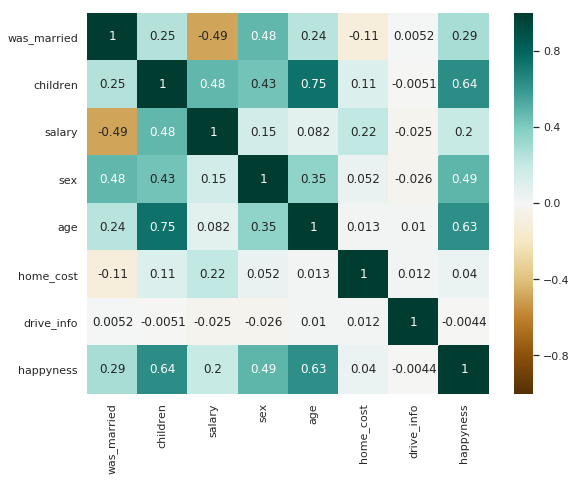

In [139]:
#визуализация
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap='BrBG')

На графике видно, что информация о вождении ни с чем не закоррелированна, поэтому можно удалить переменную

In [142]:
df = df.drop('drive_info', axis=1)

Самая высокая корреляция у пар признаков: возраст и количество детей (чем выше возраст, тем больше детей) и возраст и уровень счастья (чем старше человек, тем он чууствует себя более счастливым).

In [143]:
df_sorted = df_new.sort_values(by = ['age'])

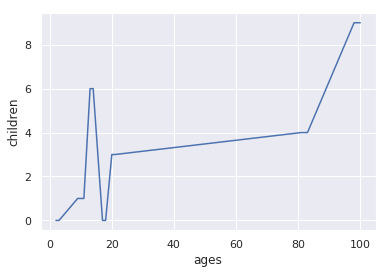

In [144]:
#график зависимости
age = df_sorted.loc[:, 'age'].values
children = df_sorted.loc[:, 'children'].values


plt.xlabel('ages')
plt.ylabel('children')

plt.plot(age, children)
plt.show()

На графике можно увидеть графика видно, что у детей 13-15 лет 6 детей.. С 20 лет все становится более логично. Чем младше челок, тем меньше у него детей. У людей старше 80 лет резко возрастает количество детей. Это может быть связано с тем, что в начале прошлого века было принято рожать больше детей. 

In [145]:
df_new[df_new['children'] == 6]

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,0.00,0.43
11,1,6.00,170399021.06,1,14.00,Entertainment,10332529.88,0.00,0.53
25,1,6.00,164177698.14,1,13.00,Entertainment,10215899.96,0.00,0.34
26,1,6.00,179862495.97,1,13.00,Entertainment,10230947.53,0.00,0.33
29,1,6.00,171682158.88,1,13.00,Entertainment,10226017.96,1.00,0.49
30,1,6.00,151262325.24,1,13.00,Entertainment,10224701.24,0.00,0.49
50,1,6.00,176002317.05,1,13.00,Entertainment,10241573.73,0.00,0.56
52,1,6.00,170502538.27,1,13.00,Entertainment,10318051.01,0.00,0.62
62,1,6.00,213352063.70,1,13.00,Entertainment,10303274.69,1.00,0.54


# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [146]:
# В датасете есть качественный признак, преобразуем его с помощью one-hot encoding
one_hot = pd.get_dummies(df_new['profession'])
df_new = df_new.drop('profession',axis = 1)
df_new

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
id,,,,,,,,
0,1,4.00,44205297.59,1,82.00,10036744.14,0.00,0.73
2,1,6.00,248905477.31,1,14.00,10433180.97,0.00,0.43
3,0,1.00,126871823.00,0,10.00,10042985.31,0.00,0.38
4,1,9.00,85960417.41,1,99.00,10219081.59,0.00,0.66
5,1,3.00,2474979.08,0,21.00,10016535.31,1.00,0.33
6,1,3.00,2106286.56,0,21.00,9980108.14,0.00,0.39
8,1,1.00,12841162.12,1,9.00,10173613.02,1.00,0.34
9,1,9.00,171898854.86,1,100.00,10184430.88,0.00,0.63
10,1,9.00,152437794.96,1,100.00,10376836.59,1.00,0.78


In [148]:
df_encoded = df_new.join(one_hot, on = 'id', how ='left').drop_duplicates()
df_encoded.head()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness,Artist,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
id,,,,,,,,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,10036744.14,0.00,0.73,0,1,0,0,0,0,0,0
2,1,6.00,248905477.31,1,14.00,10433180.97,0.00,0.43,0,0,1,0,0,0,0,0
3,0,1.00,126871823.00,0,10.00,10042985.31,0.00,0.38,0,0,0,0,0,0,1,0
4,1,9.00,85960417.41,1,99.00,10219081.59,0.00,0.66,1,0,0,0,0,0,0,0
5,1,3.00,2474979.08,0,21.00,10016535.31,1.00,0.33,0,0,0,0,0,1,0,0


Так как в датасете нет выбросов, то нам не нужна робастная нормализация. Но данные по стоимости домов не имеют нормальное распраделение, поэтому вместо стандартизации я применю нормализацию (мин макс).

In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normal_data = scaler.fit_transform(df_encoded)

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [150]:
from sklearn.cluster import KMeans

In [151]:
distortions = []
K = range(1,20)
for n_clusters in K:
    kmeanModel = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    kmeanModel.fit(normal_data)
    distortions.append(kmeanModel.inertia_)

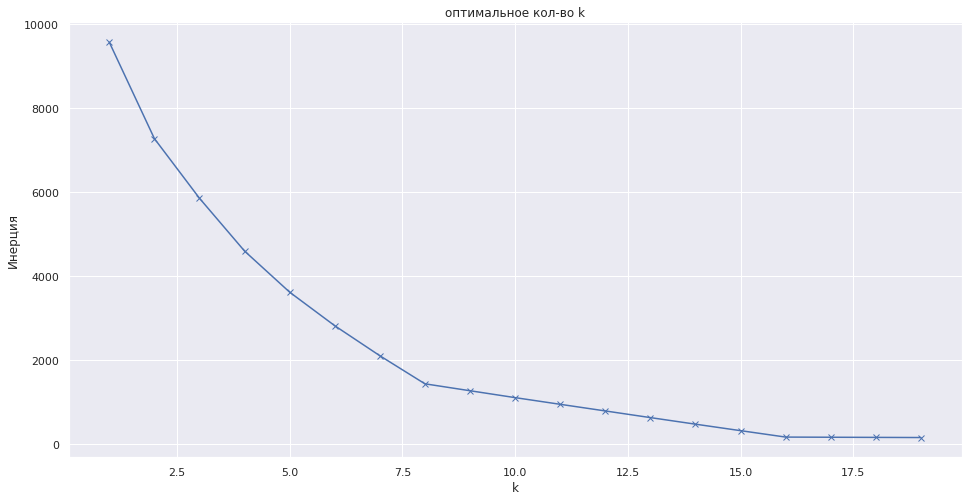

In [152]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Инерция')
plt.title('оптимальное кол-во k')
plt.show()

Из графика следует, что при примерно 8 кластерах (локоть) минимизируется внутрекластерная вариация (инерция).

In [153]:
# прогоним модель с найденным кол-вом кластеров
kmeanModel = KMeans(n_clusters=8)
kmeanModel.fit(normal_data)
labels = kmeanModel.predict(normal_data)

In [154]:
#соотнесем названия кластеров с айди жителей
normal_data_df = pd.DataFrame(normal_data)
normal_data_df['labels'] = labels
normal_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,1.00,0.44,0.12,1.00,0.82,0.30,0.00,0.73,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,4
1,1.00,0.67,0.72,1.00,0.12,0.85,0.00,0.43,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,5
2,0.00,0.11,0.36,0.00,0.08,0.30,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
3,1.00,1.00,0.24,1.00,0.99,0.55,0.00,0.66,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,1.00,0.33,0.00,0.00,0.19,0.27,1.00,0.33,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,6


# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [155]:
from sklearn.manifold import TSNE

In [183]:
#сократили количество признаков до 2
data_x1_x2 = TSNE(n_components=2, learning_rate='auto',
                random_state=22, n_jobs=-1, 
                init='random').fit_transform(normal_data)

In [184]:
data_x1_x2

array([[-34.049633 , -38.924297 ],
       [ 48.256607 ,  -1.8860188],
       [-13.60907  ,  -3.2419722],
       ...,
       [ -2.9227343, -79.31769  ],
       [-21.143848 ,   5.5174437],
       [-61.382202 ,   1.3761077]], dtype=float32)

# Нарисовать полученные кластеры (10 баллов)

In [188]:
data_x1 = data_x1_x2[:,0]
data_x2 = data_x1_x2[:,1]

In [194]:
labels

array([4, 5, 2, ..., 3, 2, 6], dtype=int32)

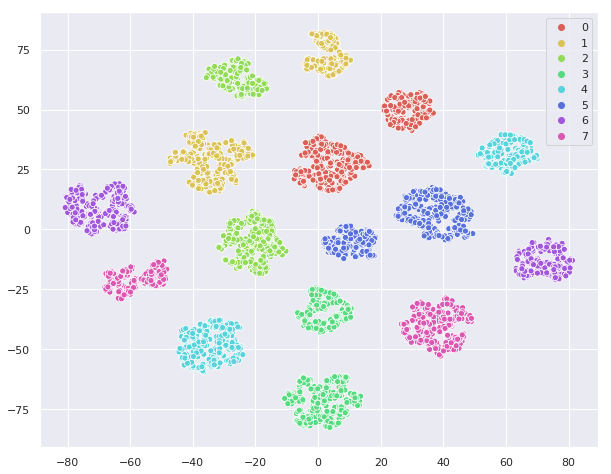

In [217]:
#отрисуем кластеры 
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=data_x1, y=data_x2, hue=labels.tolist(),
                palette=sns.color_palette("hls", 8))

Судя по графику, данные делятся на 17 кластеров, а не 8. 

In [214]:
#зададим 17 кластеров
kmeanModel17 = KMeans(n_clusters=17)
kmeanModel17.fit(normal_data)
labels17 = kmeanModel17.predict(normal_data)

In [218]:
#соотнесем названия 17 кластеров с айди жителей
normal_data_df = pd.DataFrame(normal_data)
normal_data_df['labels'] = labels17
normal_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,1.00,0.44,0.12,1.00,0.82,0.30,0.00,0.73,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2
1,1.00,0.67,0.72,1.00,0.12,0.85,0.00,0.43,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
2,0.00,0.11,0.36,0.00,0.08,0.30,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,3
3,1.00,1.00,0.24,1.00,0.99,0.55,0.00,0.66,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
4,1.00,0.33,0.00,0.00,0.19,0.27,1.00,0.33,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,13


In [228]:
#сократили количество признаков до 2
data_x1_x2 = TSNE(n_components=2, learning_rate='auto',
                random_state=22, n_jobs=-1, 
                init='random').fit_transform(normal_data)

In [229]:
data_x1 = data_x1_x2[:,0]
data_x2 = data_x1_x2[:,1]

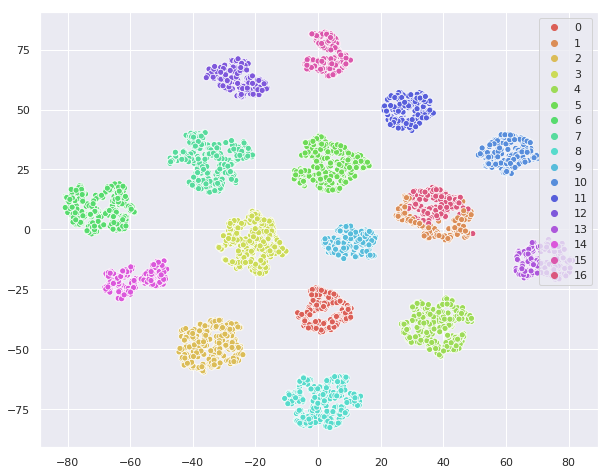

In [233]:
#отрисуем кластеры 
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=data_x1, y=data_x2, palette=sns.color_palette("hls", 17),hue=labels17.tolist(),legend="full") 

Теперь на графике выделены цветом 17 отдельных класетров, но в одном из них есть вкрапления другого цвета

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**